In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.metrics import mean_squared_error


In [2]:
from sklearn.datasets import fetch_openml

dataset = fetch_openml(name="boston", version=1, as_frame=True)
df = dataset.data
df['Taget'] = dataset.target

In [3]:
print("Dataset's head:")
display(df.head())
print("Dataset's info:")
print("1- Info")
display(df.info())
print("2- Shape:", df.shape)
print("3- Describe:")
display(df.describe())

Dataset's head:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Taget
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Dataset's info:
1- Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  Taget    506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


None

2- Shape: (506, 14)
3- Describe:


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,Taget
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
# transforming categoris to dummies
dummies = pd.get_dummies(df[['CHAS','RAD']], drop_first=True)

# droping the original columns
df = df.drop(['CHAS','RAD'], axis=1)

# concatenating the dummies

df = pd.concat([df, dummies], axis=1)

In [5]:
# selecting numerical columns
num_cols = list(df.iloc[:0].drop(dummies.columns, axis=1).columns)
# Standarization
df[num_cols] = (df[num_cols] - df[num_cols].mean()) / df[num_cols].std()

Number of components to explain 80% of the variance: 11


<BarContainer object of 20 artists>

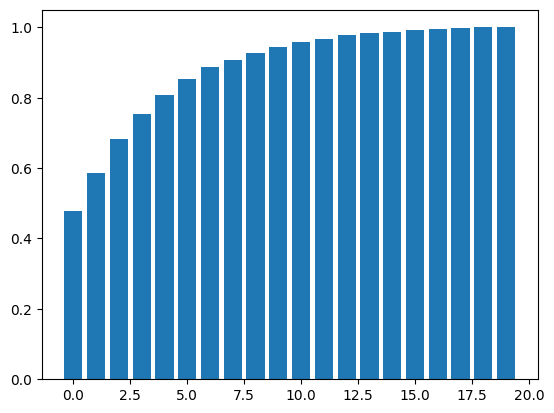

In [6]:

# using PCA
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df.drop('Taget', axis=1))
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

print( "Number of components to explain 80% of the variance:", d)
# plot explained variance
plt.bar(range(len(cumsum)), cumsum)

In [7]:
pca = PCA(n_components=d)
df_pca = pca.fit_transform(df.drop('Taget', axis=1))
display(df_pca.shape)

(506, 11)

So I learned that since PCA handles only features with linear relations, It won't be helpful to our model, since it only handles Linear data,

So I won't be using it, instead I would opt to use the feature selection in NN models

In [8]:
# Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, df['Taget'], test_size=0.2, random_state=42)

## refrence
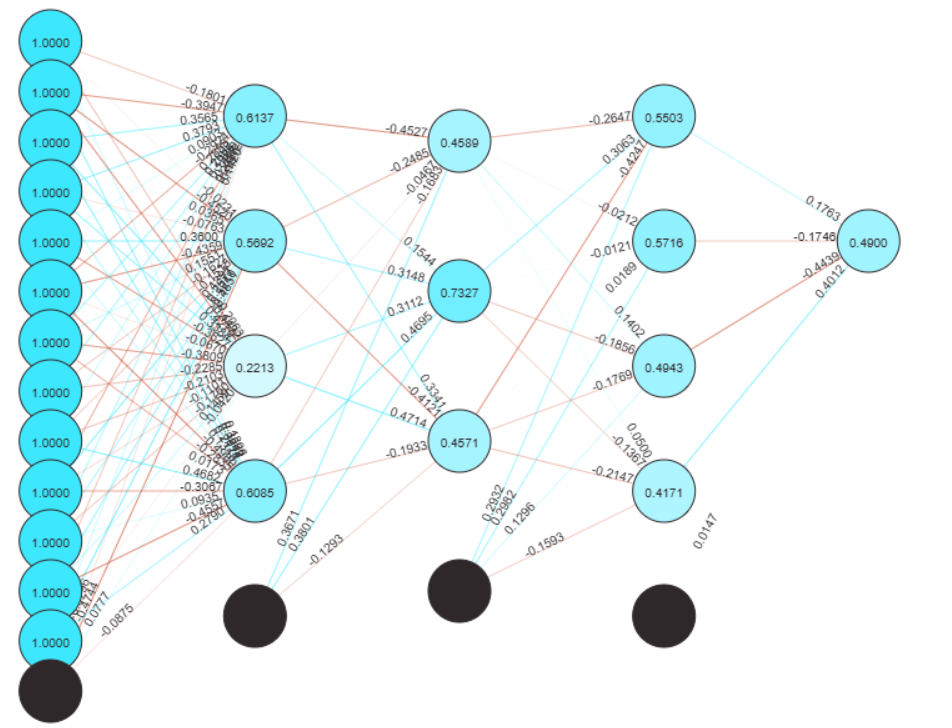
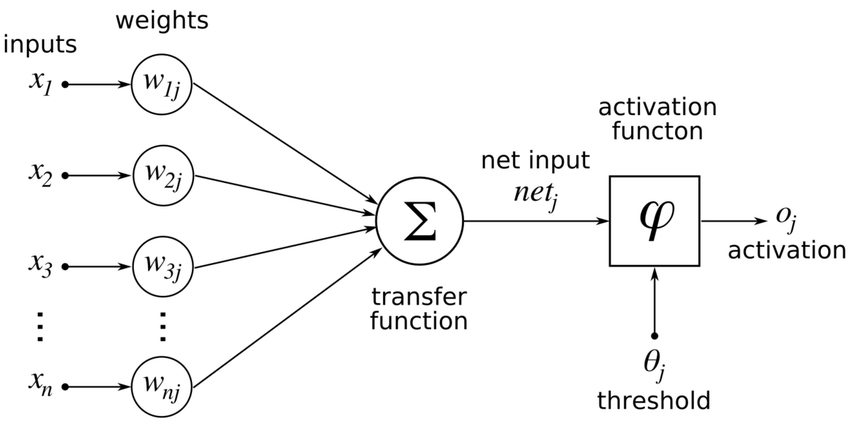
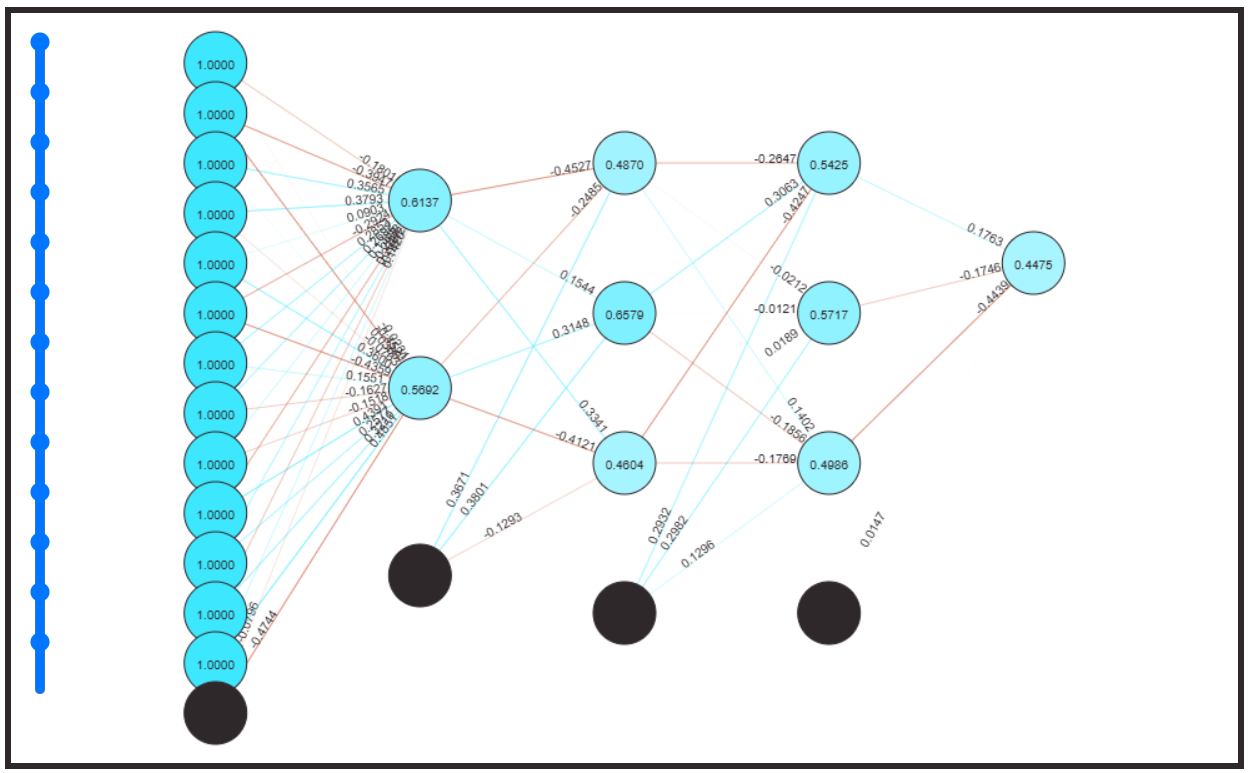

In [9]:
# class activations:
#     def __init__(self, activation):
#         self.map = {
#             'sigmoid':self.sigmoid,
#             'tanh': self.tanh,
#             'relu': self.relu,
#             'leaky_relu': self.leaky_relu
#         }
#         self.activation = activation
    
#     def sigmoid(Z):
#         A = 1 / (1 + np.exp(-Z))
#         return A, Z
#     def tanh(Z):
#         A = np.tanh(Z)
#         return A, Z
#     def relu(Z):
#         A = np.maximum(0, Z)
#         return A, Z
#     def leaky_relu(Z):
#         A = np.maximum(0.1 * Z, Z)
#         return A, Z

In [10]:
# Builing forward propagation model
class NN():
    def __init__(self, input_size, layer_sizes, output_size,learning_rate = 0.001, activation = 'sigmoid'): # Activation sigmoid is for future updating
        self.layer_sizes = [input_size] + layer_sizes + [output_size]
        self.w = []
        self.b = []
        for i in range(len(self.layer_sizes) - 1):
            self.w.append(np.random.randn(self.layer_sizes[i], self.layer_sizes[i+1]) * np.sqrt(2.0 / self.layer_sizes[i]))
            self.b.append(np.zeros((1, self.layer_sizes[i+1])))
        self.lr = learning_rate
    
    def relu(self, Z):
        return np.maximum(0.01 * Z, Z)  # Small slope for negative values

    def relu_gradient(self, A):
        return np.where(A > 0, 1, 0.01)  # Gradient won't be exactly zero

    
    
    
    def forward_block(self, w, x, b, linear = False):
        # from inputs X to z
        z = np.matmul(x,w) +b
        if linear:
            return z
        a = self.relu(z)
        return a, z
    
    def forward_propagation(self, x):
        self.a = [x]
        self.z = []
        for w, b in zip(self.w, self.b):
            a_current, z_current = self.forward_block(w, self.a[-1], b)
            self.a.append(a_current)
            self.z.append(z_current)
        return self.a[-1]
    
    def backward_block(self, dz, layer_number):
        dw = np.dot(self.a[layer_number].T, dz)
        db = np.sum(dz, axis=0, keepdims=True)
        return dw, db
    
    def back_propagation(self, y):
        m = y.shape[0]
        da = 2 * (self.a[-1] - y) / m
        for i in reversed(range(len(self.w))):
            dz = da * self.relu_gradient(self.z[i])
            #if np.any(np.isnan(dz)): raise ValueError(f'NaN detected in dz')
            dw, db = self.backward_block(dz, i)
            #print(f"Layer {i}: Mean |dz|: {np.mean(np.abs(dz))}, Mean |dw|: {np.mean(np.abs(dw))}")
            self.w[i] = self.w[i] - dw*self.lr
            self.b[i] = self.b[i] - db*self.lr
            if i > 0:  # Propagate error backward
                da = np.dot(dz, self.w[i].T)
                
            

    def calculate_loss(self, a, y):
        return np.mean((a - y) ** 2) ** 0.5
    
    def fit(self, data, target,  epochs = 1,batch_size = 1, verbose = False):  
        for i in range(epochs):
            total_loss = 0

            for j in range(len(data)//batch_size):
                X_batch = data[j:j+batch_size]
                y_batch = target[j:j+batch_size]
                self.forward_propagation(X_batch)
                self.back_propagation(y_batch)
                total_loss += self.calculate_loss(self.a[-1], y_batch)

            if (i % 10 == 0) and verbose:
                print(f"Epoch {i}, Loss: {total_loss / len(data)}")
                
    def predict(self, x):
        
        return self.forward_propagation(x)
        

In [11]:
X_small = np.array([[0, 0], [0, 1], [1, 0]])
y_small = np.array([[0], [1], [1]])
model = NN(input_size=2, layer_sizes=[4, 3, 4], learning_rate=0.001, output_size=1)
model.fit(X_small, y_small, epochs=1000, batch_size=1)
preds = model.predict(X_small)
print(preds)

[[0.05665877]
 [0.98157472]
 [0.99005011]]


In [12]:
# # Testing
test_layers = {}
test_layers[0] = np.random.randn(13,1)
test_layers[1] = np.random.randn(4,1)
test_layers[2] = np.random.randn(3,1)
test_layers[3] = np.random.randn(4,1)
# test_object = NN(13,[4,3,4],1)
# test_object.init_layers()

# # Tesing sigmoid
# test_sigmoid = test_object.sigmoid(test_layers[0])
# test_sigmoid_dif = test_object.sigmoid_gradient(test_layers[0])



# # Testing weight initializtion
# for i in range(len(test_layers)-1):
#     assert test_layers[i].shape[0] == test_object.w[i].shape[1], f"Shape mismatch for input and weights {i}, {test_layers[i].shape}, {test_object.w[i].shape}"


# # Testing forward block
# test_object.forward_block(test_object.w[0], test_layers[0], 1)

# model = NN(13,[4,3,4],1)
# model.init_layers()


# # Testing forward propagation
# assert (model.forward_propagation(test_layers[0]).shape) == (1, 1), f'Shape Mismatch: {model.forward_propagation(test_layers[0]).shape}'


# Testing back prop
model = NN(input_size=21, layer_sizes=[4, 3, 4], learning_rate=0.01, output_size=1)
model.fit(np.array(X_train), np.array(y_train).reshape(-1,1), epochs=1000, verbose = 1 ,batch_size=32)


Epoch 0, Loss: 0.02981504269880323
Epoch 10, Loss: 0.01770460070077429
Epoch 20, Loss: 0.017572034482749084
Epoch 30, Loss: 0.01748206684282573
Epoch 40, Loss: 0.017414752598140865
Epoch 50, Loss: 0.017360362279002787
Epoch 60, Loss: 0.017314397042982113
Epoch 70, Loss: 0.017275241266721867
Epoch 80, Loss: 0.017241700064920328
Epoch 90, Loss: 0.017211657950479412
Epoch 100, Loss: 0.017184295392046522
Epoch 110, Loss: 0.01715992143442402
Epoch 120, Loss: 0.017137878096994155
Epoch 130, Loss: 0.017117816848518576
Epoch 140, Loss: 0.01709935343849748
Epoch 150, Loss: 0.017082417798694238
Epoch 160, Loss: 0.017066719475600824
Epoch 170, Loss: 0.017051731391172414
Epoch 180, Loss: 0.017037139696398185
Epoch 190, Loss: 0.017022692351869765
Epoch 200, Loss: 0.017008261200452582
Epoch 210, Loss: 0.0169935180612939
Epoch 220, Loss: 0.016978332260453966
Epoch 230, Loss: 0.01696240491065225
Epoch 240, Loss: 0.016945763561330016
Epoch 250, Loss: 0.016928264506922412
Epoch 260, Loss: 0.016909657033

In [13]:
np.array(X_train).shape

(404, 21)

0.1379536809510603


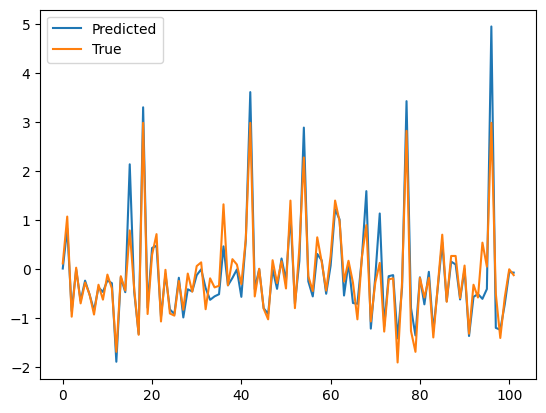

In [14]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(np.array(X_test))
print(mean_squared_error(y_pred, np.array(y_test)))


plt.plot(range(len(y_pred)),y_pred, label = 'Predicted')
plt.plot(range(len(y_pred)),y_test, label = 'True')
plt.legend()

In [15]:
# for i in model.dw:
#     print(i.shape)


for i in model.w:
    print(i.shape)

(21, 4)
(4, 3)
(3, 4)
(4, 1)


In [16]:
y_pred.shape, y_test.shape

((102, 1), (102,))

Those are some notes for me, so please disregard

Shape of 
W
W (Weights):

If 
W
W is for a layer with 
n
n neurons and 
m
m inputs, its shape is 
(
n
,
m
)
(n,m).

Shape of 
X
X (Input):

If 
X
X is a single input (one training example), it should be a column vector with shape 
(
m
,
1
)
(m,1).

If 
X
X is a batch of inputs (multiple training examples), it should have shape 
(
m
,
k
)
(m,k), where 
k
k is the number of examples.

Shape of 
b
b (Bias):

The bias 
b
b should have the same number of rows as 
W
W has neurons, so its shape is 
(
n
,
1
)
(n,1).

Shape of 
Z
Z (Output):

The output 
Z
Z will have shape 
(
n
,
1
)
(n,1) for a single input or 
(
n
,
k
)
(n,k) for a batch of inputs.

model.dw[1].shape, model.a[1].shape
is ((3, 4), (3, 1)) is correct

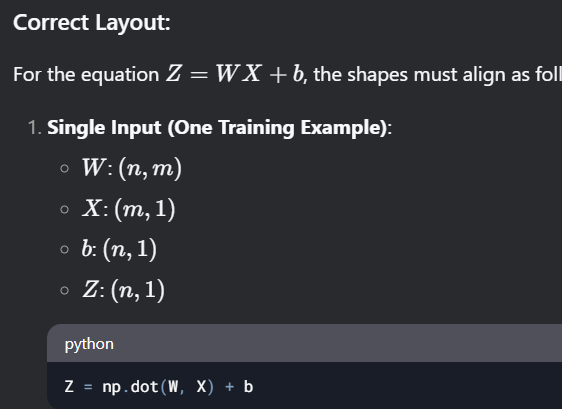
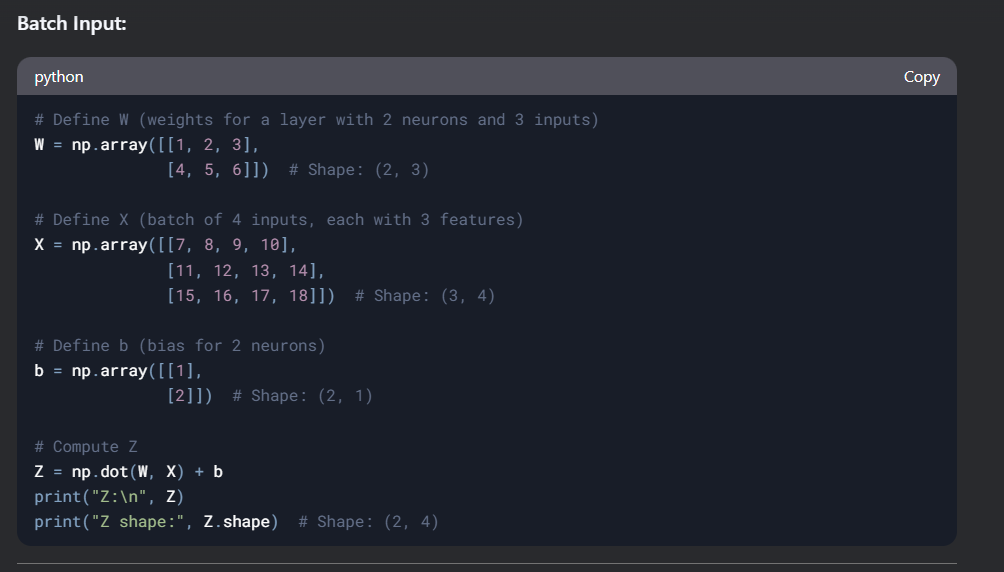
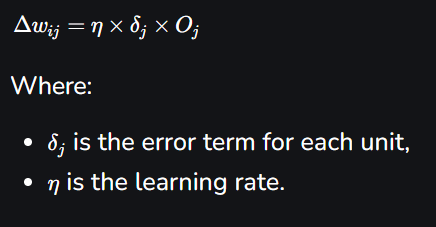
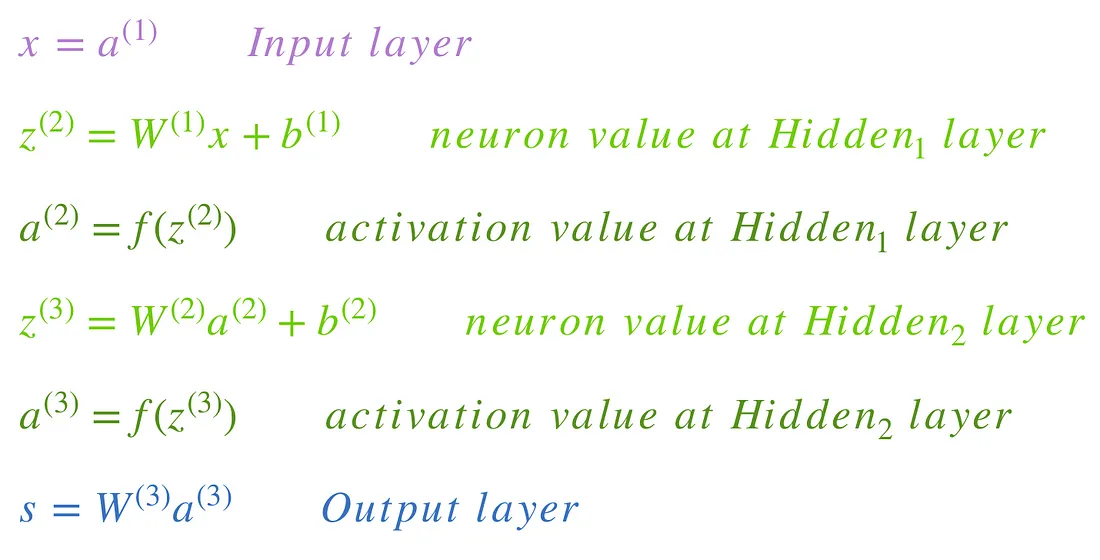
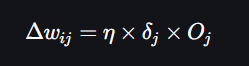

In [17]:

# Define arr1 (2x3 matrix)
arr1 = np.array([[1, 2, 3],
                 [4, 5, 6]])

# Define arr2 (3x2 matrix)
arr2 = np.array([[7, 8],
                 [9, 10],
                 [11, 12]])

print("arr1:\n", arr1)
print("arr1 shape:", arr1.shape)  # (2, 3)

print("\narr2:\n", arr2)
print("arr2 shape:", arr2.shape)  # (3, 2)

# Matrix multiplication using np.dot
result_dot = np.dot(arr1, arr2)

# Matrix multiplication using np.matmul
result_matmul = np.matmul(arr1, arr2)


print("Result using np.dot:\n", result_dot)
print("Result using np.matmul:\n", result_matmul)

arr1:
 [[1 2 3]
 [4 5 6]]
arr1 shape: (2, 3)

arr2:
 [[ 7  8]
 [ 9 10]
 [11 12]]
arr2 shape: (3, 2)
Result using np.dot:
 [[ 58  64]
 [139 154]]
Result using np.matmul:
 [[ 58  64]
 [139 154]]
